## Network Analysis Code

In [1]:
import pandas as pd
import numpy as np
import itertools as it
from tools import networkHelpers as nh

import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
adj_dict = pd.read_csv('../data/kin/kin_anscombe_weighted.csv', header=None, sep='\t')
adj_dict.head()

,0,1,2
0,MST1R,YES1,1.224745
1,TYRO3,YES1,1.224745
2,FGR,SRC,2.345208
3,ATR,FLT1,1.224745
4,LYN,PRKCD,3.082207


In [244]:
np.power((adj_dict[2].max()/2), 2) - 3/8

101.99999999999994

In [246]:
2*np.sqrt(3/8)

1.224744871391589

In [127]:
louv = pd.read_csv('../results/weighted/louvain_clusters.txt', sep='\t')
louv_sub = pd.read_csv('../results/weighted/louvain_small_clusters.txt', sep='\t')
louv.head()

,names,cluster
0,MST1R,3
1,YES1,3
2,TYRO3,3
3,FGR,3
4,SRC,3


In [43]:
# construct an adjacency matrix from the adj_dict
adj_mat = adj_dict.append(adj_dict.rename(columns={0:1,1:0,2:2}),
                          ignore_index=True)\
    .pivot(index=0, columns=1, values=2)\
    .fillna(0)

In [122]:
adj_mat = adj_mat.loc[louv.names]
adj_mat = adj_mat[adj_mat.index]

In [123]:
from sklearn.manifold import SpectralEmbedding, Isomap
from umap import UMAP

/Users/isrobson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


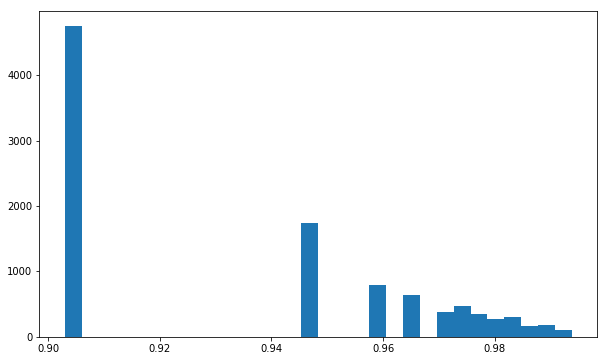

In [124]:
fig, ax = plt.subplots(figsize=(10,6))
sigma2 = 4
kernelized = np.exp(-np.power(adj_mat.values, -1)/(2*sigma2))
ax.hist(kernelized[kernelized.nonzero()], bins=30)
plt.show()

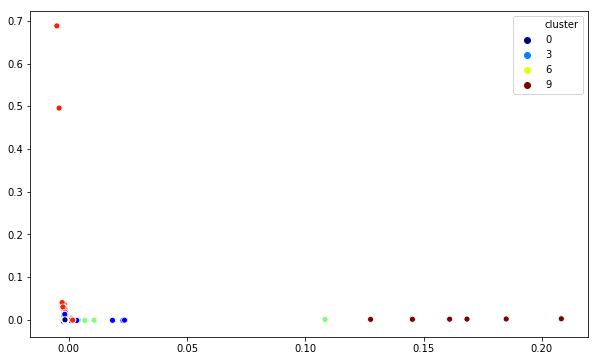

In [125]:
fig, ax = plt.subplots(figsize=(10,6))
embed = SpectralEmbedding(n_components=2, affinity='precomputed')
coords = embed.fit_transform(kernelized)

sns.scatterplot(x=coords[:,0], y=coords[:,1], hue=louv.cluster, palette='jet', ax=ax)
plt.show()

In [221]:
markers = {x+1:'$\\bf{'+y+'}$' for x,y in enumerate('ABCDEFGHIJKLMNOPQRSTUVWXYZ')}

/Users/isrobson/anaconda3/lib/python3.7/site-packages/umap/umap_.py:1319: UserWarning: Using precomputed metric; transform will be unavailable for new data
  warn("Using precomputed metric; transform will be unavailable for new data")


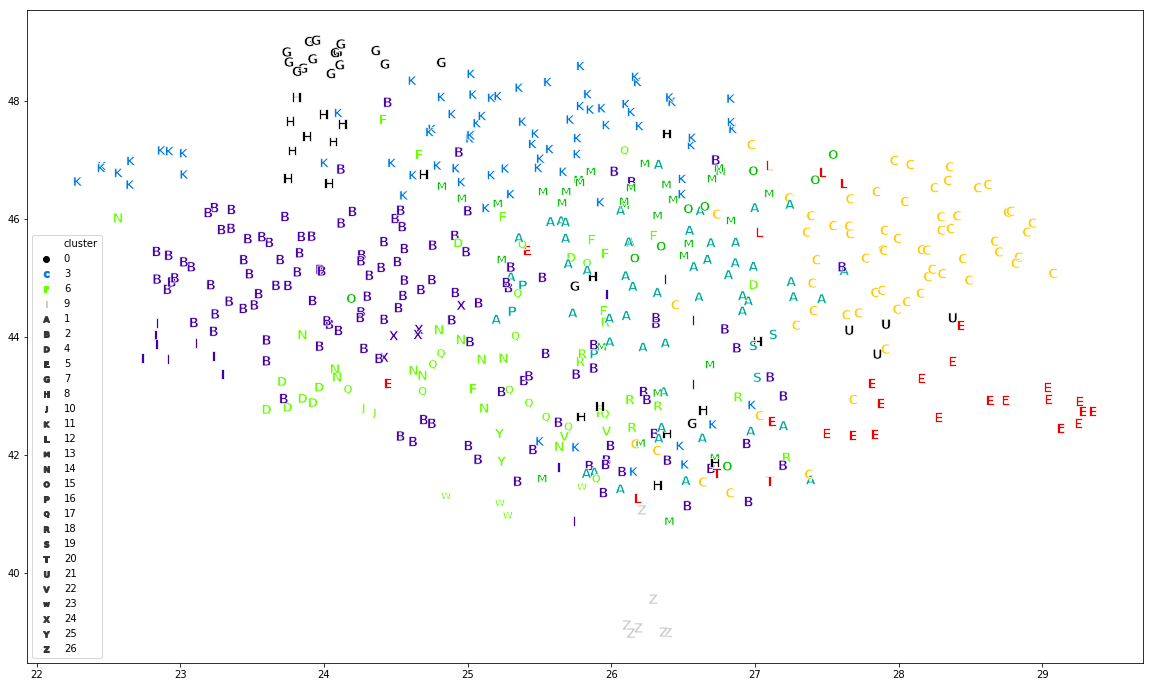

In [241]:
fig, ax = plt.subplots(figsize=(20,12))
embed = UMAP(n_components=2, metric='precomputed', n_neighbors=15, min_dist=0.5)
coords = embed.fit_transform(1-kernelized)

sns.scatterplot(x=coords[:,0], y=coords[:,1], ax=ax, hue=louv.cluster, style=louv_sub.cluster, palette='nipy_spectral', markers=markers, s=100)
plt.show()

In [199]:
from sklearn.metrics import silhouette_samples, silhouette_score

sils = silhouette_samples(coords, louv_sub.cluster)

#display(sils)

In [200]:
sil_dat = pd.DataFrame(sils, columns=['score'], index=louv.index)
sil_dat['super'] = louv.cluster
sil_dat['sub'] = louv_sub.cluster
sil_dat['names'] = louv.names
sil_dat.sort_values(['sub', 'score'], inplace=True, ascending=False)
sil_dat.reset_index(inplace=True)
sil_dat['index'] = range(sil_dat.shape[0])
sil_dat.head()

,index,score,super,sub,names
0,0,0.960793,9,26,PPIP5K1
1,1,0.960558,9,26,IPMK
2,2,0.957222,9,26,PPIP5K2
3,3,0.954883,9,26,IP6K3
4,4,0.954000,9,26,IP6K1


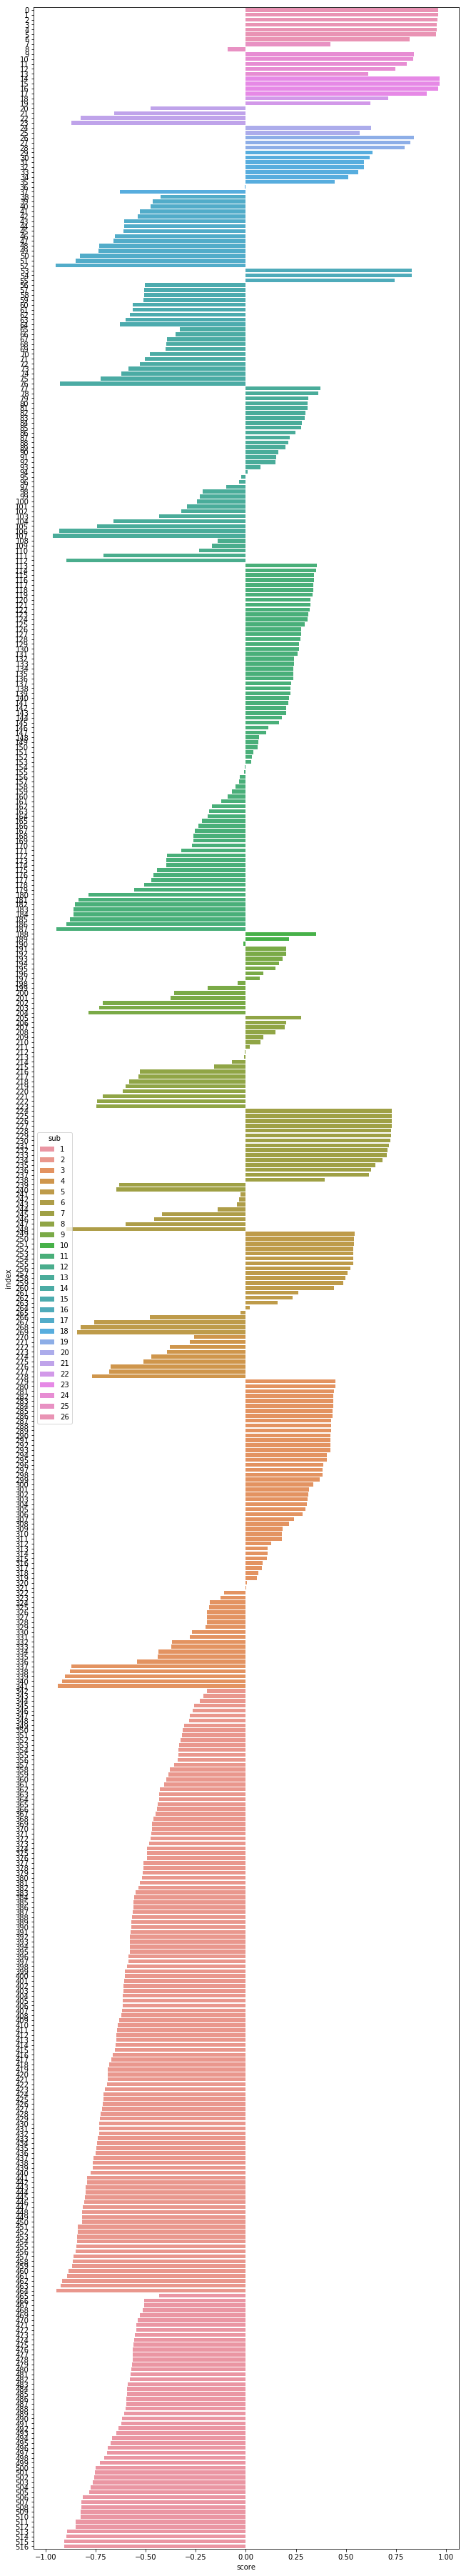

In [201]:
fig, ax = plt.subplots(figsize=(9, 50))
plt.tight_layout()
sns.barplot(x='score', y='index', hue='sub', ci=None,dodge=False, orient='h', data=sil_dat, ax=ax)
plt.show()

/Users/isrobson/anaconda3/lib/python3.7/site-packages/umap/umap_.py:1319: UserWarning: Using precomputed metric; transform will be unavailable for new data
  warn("Using precomputed metric; transform will be unavailable for new data")


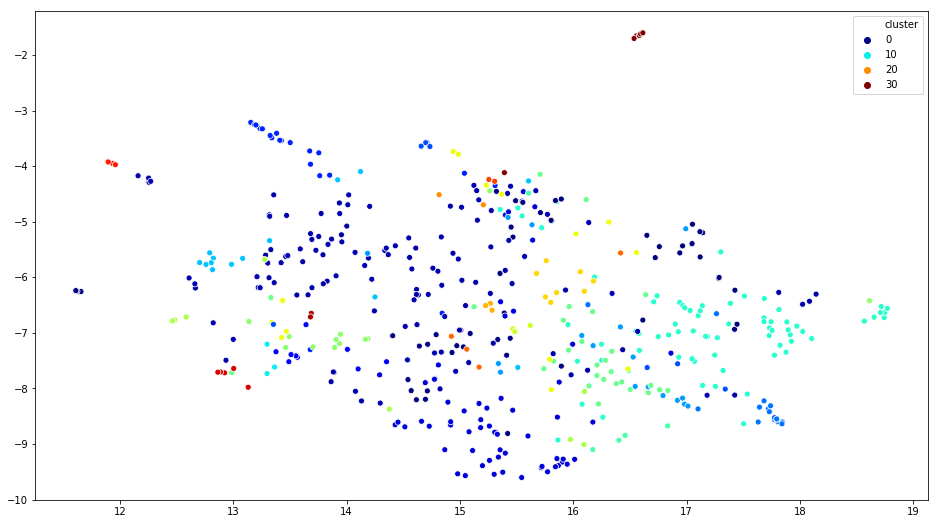

In [129]:
fig, ax = plt.subplots(figsize=(16,9))
embed = UMAP(n_components=2, metric='precomputed', n_neighbors=5)
coords = embed.fit_transform(1-kernelized)

sns.scatterplot(x=coords[:,0], y=coords[:,1], ax=ax, hue=louv_sub.cluster, palette='jet')
plt.show()